the key help comes from [https://matplotlib.org/examples/animation/simple_3danim.html](https://matplotlib.org/examples/animation/simple_3danim.html)

Clic for [matplotlib.animation.FuncAnimation](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html)

interval - Delay between frames in milliseconds. Defaults to 200.

In [1]:
%matplotlib notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
import numpy.random as npr

In [8]:
class AgBase():
    def __init__(self):
        self.breed=npr.randint(0,2)
        self.x=npr.random_sample()
        self.y=npr.random_sample()
        self.z=npr.random_sample()
    
    def move(self):
        self.x=npr.random_sample()
        self.y=npr.random_sample()
        self.z=npr.random_sample()
        
    def reportPos(self):
        return self.x, self.y, self.z
    
    def reportBreed(self):
        return self.breed

In [13]:
agList=[]
for i in range(100):
    a=AgBase()
    agList.append(a)

In [14]:
def init():
    ax.set_xlim3d([0.0, 1.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([0.0, 1.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0.0, 1.0])
    ax.set_zlabel('Z')

In [11]:
def update(frame):
    xList0=[]
    yList0=[]
    zList0=[]
    xList1=[]
    yList1=[]
    zList1=[]
    [agList[i].move() for i in range(len(agList))]
    
    for i in range(len(agList)):
        x,y,z=agList[i].reportPos()
        if agList[i].reportBreed() == 0:
            xList0.append(x)
            yList0.append(y)
            zList0.append(z)
        if agList[i].reportBreed() == 1:
            xList1.append(x)
            yList1.append(y)
            zList1.append(z)        
        
    line[0][0].set_data(xList0,yList0) 
    # NOTE: there is no .set_data() for 3 dim data...
    line[0][0].set_3d_properties(zList0)

    line[1][0].set_data(xList1,yList1)    
    line[1][0].set_3d_properties(zList1)

    return line

<IPython.core.display.Javascript object>


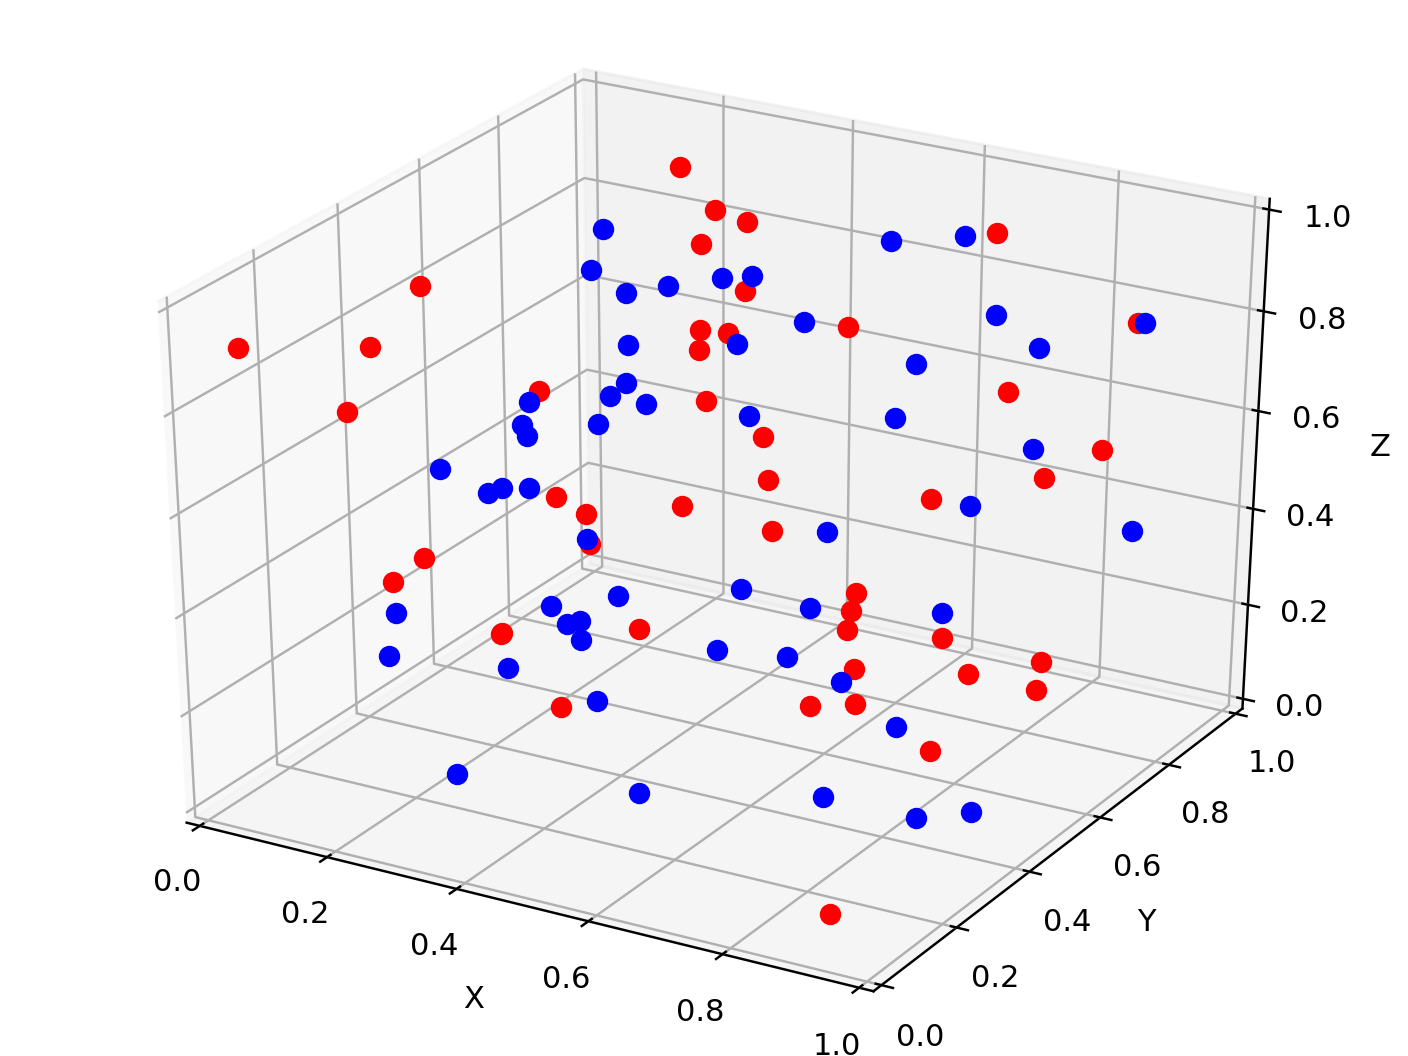

'\n#ani.save("boh.mp4") \nplt.show() # for .py version\n'

In [16]:
fig = plt.figure('3D moving dots')
ax = p3.Axes3D(fig)

line=[ax.plot([],[],[],'ro'),ax.plot([],[],[],'bo')]

ani = FuncAnimation(fig, update, frames=50,
                    init_func=init, blit=False, repeat=False, interval=50)
"""
#ani.save("boh.mp4") 
plt.show() # for .py version
"""

In [22]:
#continuation
ani = FuncAnimation(fig, update, frames=50,
                    blit=False, repeat=False, interval=50)
plt.show()